In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import rdkit.Chem
import csv
from tqdm import tqdm

* [Descriptor PCA](#PCA)
* [Solute Space Clustering](#Clustering)
* [Neural Net Predictor](#Predictor)


## Descriptor PCA <a name="PCA"></a>

In [14]:
solvent_desc_df = pd.read_csv('./SolventMordredResults_batch0.csv')
solvent_desc_df

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_13560/2917528866.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,53,54,55,56,57,58,59,60,61,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,162,163,164,165,166,167,168,169,171,172,173,174,175,176,177,178,180,181,182,183,184,185,186,187,189,190,191,192,193,194,195,196,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,216,217,218,219,220,221,222,223,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,267,268,341,342,343,344,345,346,347,348,349,351,352,353,354,355,356,357,358,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,378,379,380,381,382,383,384,385,387,388,389,390,391,392,393,394,396,397,398,399,400,401,402,403,405,406,407,408,409,410,411,412,414,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,432,433,434,435,436,437,438,439,441,442,443,444,445,446,447,448,449,450,451,452,45

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,4.949747,5.143137,0,0,9.517541,1.879385,3.75877,9.517541,1.189693,2.876615,...,7.126891,32.187603,114.140851,4.390033,84,5,26.0,24.0,3.5,2.250000
1,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,92.062600,6.137507,42,5,30.0,31.0,2.361111111111111,1.666667
2,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,4.174387,17.310771,46.041865,5.115763,4,0,6.0,4.0,2.25,1.000000
3,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,88.052429,6.289459,27,3,24.0,24.0,1.5,1.500000
4,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.04525,2.408576,...,6.834109,27.254130,72.057515,5.542886,18,2,16.0,14.0,3.361111111111111,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464,5.766244,5.909452,0,1,9.910095,2.224503,4.19461,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.068414,6.533436,63,6,36.0,39.0,3.222222,1.916667
12465,5.875634,5.943785,1,1,10.251662,1.961571,3.923141,10.251662,1.139074,3.007497,...,7.609367,34.745525,131.094629,5.958847,114,6,32.0,30.0,4.361111,2.333333
12466,5.875634,5.943785,1,1,10.251662,1.961571,3.923141,10.251662,1.139074,3.007497,...,7.609367,34.745525,131.094629,5.958847,114,6,32.0,30.0,4.361111,2.333333
12467,7.289847,7.007240,1,0,12.784906,1.975377,3.950753,12.784906,1.162264,3.210676,...,7.832411,37.843620,222.025542,8.539444,212,8,40.0,38.0,4.861111,2.833333


In [15]:
with open('SoluteSmiles.txt', 'r') as smi_file:
    c = csv.reader(smi_file)
    for row in c:
        smi_list = row[:12469]
print(len(smi_list))

12469


Note the warning - each column has mixed datatypes. Check before processing.

In [16]:
# Lets try the "pythonic" way of mean subtracting the data

solvent_desc_df_cent = solvent_desc_df - solvent_desc_df.mean()
solvent_desc_df_cent

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_13560/2898871276.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  solvent_desc_df_cent = solvent_desc_df - solvent_desc_df.mean()


,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC1,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9
0,-20.794991,-1.291868,-1.454305,-7.921931,1.763865,-89.264317,-0.439926,-1.278661,NaN,-1.114628,...,-0.970807,-3.895614,-1.568278,-2.044627,-2.587009,-3.133555,-3.394867,-3.759888,-4.092742,-3.958828
1,-15.230889,-1.067714,-0.613280,-4.788598,-7.476249,-66.491549,-0.067244,-1.014366,NaN,-0.983943,...,-0.652354,-3.895614,-0.651987,-0.587952,-0.555577,-0.482295,-1.709240,-4.453036,-4.092742,-3.958828
2,-16.786444,-0.589047,-1.813280,-5.588598,6.790960,-73.179747,-0.618227,-0.643689,NaN,-0.447861,...,-1.951637,-3.895614,-2.821041,-3.836387,-4.196447,-4.519849,-4.493479,-4.453036,-4.092742,-3.958828
3,-12.564222,-0.264285,-0.860899,-2.636217,3.117533,-55.990920,-0.463078,-0.316114,NaN,-0.185088,...,-1.104339,-3.895614,-1.568278,-1.890477,-2.250537,-2.573939,-4.493479,-4.453036,-4.092742,-3.958828
4,-15.948838,-0.721868,-1.300459,-4.460393,1.804913,-69.652629,-0.424650,-0.740692,NaN,-0.604378,...,-1.258489,-3.895614,-1.568278,-2.450092,-4.196447,-4.519849,-4.493479,-4.453036,-4.092742,-3.958828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464,-12.681869,-0.522484,-0.499554,-3.039578,0.713619,-56.304156,-0.277145,-0.533129,NaN,-0.482347,...,-0.607902,-3.895614,-0.556677,-0.439365,-0.355652,-1.004579,-1.819331,-4.453036,-4.092742,-3.958828
12465,-14.109677,-0.459127,-1.101159,-4.103749,5.041133,-62.223724,-0.469050,-0.500936,NaN,-0.382022,...,-0.747664,-3.895614,-1.116292,-1.756945,-2.250537,-2.728089,-2.884041,-3.066741,-4.092742,-3.958828
12466,-14.109677,-0.459127,-1.101159,-4.103749,5.041133,-62.223724,-0.469050,-0.500936,NaN,-0.382022,...,-0.747664,-3.895614,-1.116292,-1.756945,-2.250537,-2.728089,-2.884041,-3.066741,-4.092742,-3.958828
12467,31.128085,-0.619268,-1.031228,-4.880884,0.060614,175.871723,-0.083962,-0.589861,NaN,-0.464243,...,-0.565342,-3.895614,-0.949238,-1.533802,-1.999223,-2.440407,-2.547569,-2.661276,-2.483304,-2.572533


In [17]:
# How many NaN columns?
print(len(solvent_desc_df_cent.columns[solvent_desc_df_cent.isna().any()].tolist()))
solvent_desc_df_cent.columns[solvent_desc_df_cent.isna().any()].tolist()

848


['AATS0s',
 'AATS1Z',
 'AATS1are',
 'AATS1d',
 'AATS1dv',
 'AATS1i',
 'AATS1m',
 'AATS1p',
 'AATS1pe',
 'AATS1s',
 'AATS1se',
 'AATS1v',
 'AATS2Z',
 'AATS2are',
 'AATS2d',
 'AATS2dv',
 'AATS2i',
 'AATS2m',
 'AATS2p',
 'AATS2pe',
 'AATS2s',
 'AATS2se',
 'AATS2v',
 'AATS3Z',
 'AATS3are',
 'AATS3d',
 'AATS3dv',
 'AATS3i',
 'AATS3m',
 'AATS3p',
 'AATS3pe',
 'AATS3s',
 'AATS3se',
 'AATS3v',
 'AATS4Z',
 'AATS4are',
 'AATS4d',
 'AATS4dv',
 'AATS4i',
 'AATS4m',
 'AATS4p',
 'AATS4pe',
 'AATS4s',
 'AATS4se',
 'AATS4v',
 'AATS5Z',
 'AATS5are',
 'AATS5d',
 'AATS5dv',
 'AATS5i',
 'AATS5m',
 'AATS5p',
 'AATS5pe',
 'AATS5s',
 'AATS5se',
 'AATS5v',
 'AATS6Z',
 'AATS6are',
 'AATS6d',
 'AATS6dv',
 'AATS6i',
 'AATS6m',
 'AATS6p',
 'AATS6pe',
 'AATS6s',
 'AATS6se',
 'AATS6v',
 'AATS7Z',
 'AATS7are',
 'AATS7d',
 'AATS7dv',
 'AATS7i',
 'AATS7m',
 'AATS7p',
 'AATS7pe',
 'AATS7s',
 'AATS7se',
 'AATS7v',
 'AATS8Z',
 'AATS8are',
 'AATS8d',
 'AATS8dv',
 'AATS8i',
 'AATS8m',
 'AATS8p',
 'AATS8pe',
 'AATS8s',
 'AA

Thats a lot of NaN columns - lets try casting the df into floats

In [18]:
err_vals= ["missing intrinsic state for ['O'] (ATS0s/Props)",
           'divide by zero encountered in log (VR3_A/VR3)',
           "missing intrinsic state for ['N'] (ATS0s/Props)",
           "missing intrinsic state for ['S'] (ATS0s/Props)",
          'invalid value encountered in double_scalars (AATS3dv/GSum3_prop)']

solvent_desc_df_float = pd.read_csv('./SolventMordredResults_batch0.csv').apply(pd.to_numeric, errors = 'coerce').astype(float)
solvent_desc_df_float_cent = solvent_desc_df_float - solvent_desc_df_float.mean()
solvent_desc_df_float_cent

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_13560/2479732460.py:7: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,53,54,55,56,57,58,59,60,61,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,162,163,164,165,166,167,168,169,171,172,173,174,175,176,177,178,180,181,182,183,184,185,186,187,189,190,191,192,193,194,195,196,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,216,217,218,219,220,221,222,223,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,267,268,341,342,343,344,345,346,347,348,349,351,352,353,354,355,356,357,358,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,378,379,380,381,382,383,384,385,387,388,389,390,391,392,393,394,396,397,398,399,400,401,402,403,405,406,407,408,409,410,411,412,414,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,432,433,434,435,436,437,438,439,441,442,443,444,445,446,447,448,449,450,451,452,45

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-9.025790,-6.608088,-0.162242,-0.158553,-12.703433,-0.392159,-0.755194,-12.703433,-0.020546,-0.697877,...,-2.020836,-20.535647,-155.108815,-4.070970,-6.741451e+08,-22.413746,-66.392654,-82.793327,-3.462960,-1.919626
1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,-0.730187,...,-1.023576,-19.178552,-177.187065,-2.323496,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960
2,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,-1.725035,...,-4.973340,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626
3,-9.732897,-7.751226,-0.162242,-0.158553,-14.220974,-0.271544,-0.513965,-14.220974,0.123095,-0.886868,...,-1.520670,-21.781933,-181.197236,-2.171543,-6.741451e+08,-24.413746,-68.392654,-82.793327,-5.462960,-2.669626
4,-10.928331,-8.446043,-0.162242,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,-1.165916,...,-2.313618,-25.469120,-197.192151,-2.918117,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,-0.589961,...,-0.782055,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960
12465,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,-0.566995,...,-1.538360,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293
12466,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,-0.566995,...,-1.538360,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293
12467,-6.685690,-4.743986,0.837758,-0.158553,-9.436068,-0.296168,-0.563211,-9.436068,-0.047974,-0.363815,...,-1.315316,-14.879630,-47.224124,0.078442,-6.741450e+08,-19.413746,-52.392654,-68.793327,-2.101849,-1.336293


Remove duplicates

In [12]:
solvent_desc_df_float_cent_smi = solvent_desc_df_float_cent.copy()
solvent_desc_df_float_cent_smi.insert(0, "SMILES", smi_list, True)
solvent_desc_df_float_cent

ValueError: Length of values (12469) does not match length of index (1613)

In [19]:
solvent_desc_df_float_cent = solvent_desc_df_float_cent.drop_duplicates()
solvent_desc_df_float_cent

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-9.025790,-6.608088,-0.162242,-0.158553,-12.703433,-0.392159,-0.755194,-12.703433,-0.020546,-0.697877,...,-2.020836,-20.535647,-155.108815,-4.070970,-6.741451e+08,-22.413746,-66.392654,-82.793327,-3.462960,-1.919626
1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,-0.730187,...,-1.023576,-19.178552,-177.187065,-2.323496,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960
2,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,-1.725035,...,-4.973340,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626
3,-9.732897,-7.751226,-0.162242,-0.158553,-14.220974,-0.271544,-0.513965,-14.220974,0.123095,-0.886868,...,-1.520670,-21.781933,-181.197236,-2.171543,-6.741451e+08,-24.413746,-68.392654,-82.793327,-5.462960,-2.669626
4,-10.928331,-8.446043,-0.162242,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,-1.165916,...,-2.313618,-25.469120,-197.192151,-2.918117,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,3.678271,1.248378,0.837758,-0.158553,7.037923,0.285937,0.600997,7.037923,0.119712,0.477485,...,1.133889,4.125765,18.865364,-0.879028,-6.741442e+08,11.586254,29.607346,41.206673,-1.074071,0.580374
12463,-8.209293,-5.841773,-0.162242,-0.158553,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,-0.589961,...,-0.782055,-3.657664,-79.340868,8.803434,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960
12464,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,-0.589961,...,-0.782055,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960
12465,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,-0.566995,...,-1.538360,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293


Impute NaNs with the column mean

In [20]:
solvent_desc_df_float_cent.columns[solvent_desc_df_float_cent.isna().any()].tolist()
solvent_desc_df_float_cent = solvent_desc_df_float_cent.fillna(solvent_desc_df_float_cent.mean(axis = 0))
solvent_desc_df_float_cent[solvent_desc_df_float_cent.isna().any(axis=1)]

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-9.025790,-6.608088,-0.162242,-0.158553,-12.703433,-0.392159,-0.755194,-12.703433,-0.020546,-0.697877,...,-2.020836,-20.535647,-155.108815,-4.070970,-6.741451e+08,-22.413746,-66.392654,-82.793327,-3.462960,-1.919626
1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,-0.730187,...,-1.023576,-19.178552,-177.187065,-2.323496,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960
2,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,-1.725035,...,-4.973340,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626
3,-9.732897,-7.751226,-0.162242,-0.158553,-14.220974,-0.271544,-0.513965,-14.220974,0.123095,-0.886868,...,-1.520670,-21.781933,-181.197236,-2.171543,-6.741451e+08,-24.413746,-68.392654,-82.793327,-5.462960,-2.669626
4,-10.928331,-8.446043,-0.162242,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,-1.165916,...,-2.313618,-25.469120,-197.192151,-2.918117,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,3.678271,1.248378,0.837758,-0.158553,7.037923,0.285937,0.600997,7.037923,0.119712,0.477485,...,1.133889,4.125765,18.865364,-0.879028,-6.741442e+08,11.586254,29.607346,41.206673,-1.074071,0.580374
12463,-8.209293,-5.841773,-0.162242,-0.158553,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,-0.589961,...,-0.782055,-3.657664,-79.340868,8.803434,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960
12464,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,-0.589961,...,-0.782055,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960
12465,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,-0.566995,...,-1.538360,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293


Do PCA

In [21]:
# First, lets work with columns,instead of rows
solvent_desc_df_float_cent = solvent_desc_df_float_cent.T
#Eigenvalue decomp.
w, v = np.linalg.eig(solvent_desc_df_float_cent @ solvent_desc_df_float_cent.T)

LinAlgError: Array must not contain infs or NaNs

Let's analyze and plot the eigenvalues

In [22]:
d = np.real(sorted([i for i in w if i > 0], reverse = True))
print(f'Positive Eigenvalues: {len(d)}')
order = np.real(w).argsort()[::-1]
rank = order.argsort()
print(f'Descending sort of Eigenvalues:\n{rank}')

NameError: name 'w' is not defined

Looks like the first three unsorted eigenvectors are actually the first three members of the eigenbasis

NameError: name 'd' is not defined

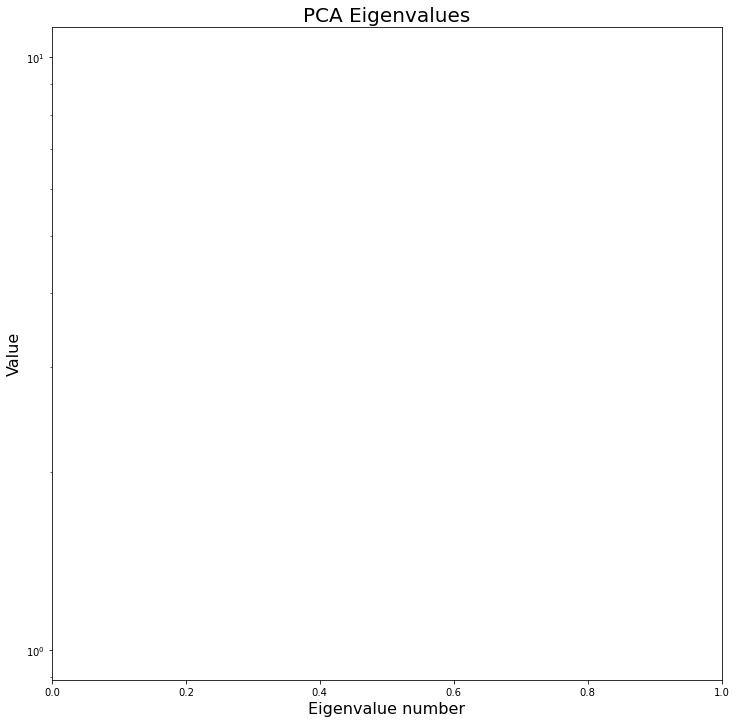

In [23]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('PCA Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.set_yscale('log')
ax = plt.plot(range(len(d[:-4])), d[:-4], color = 'blue')
plt.savefig('./SolutePCAEigVal.png', bbox_inches='tight')
plt.savefig('./SolutePCAEigVal.pdf', bbox_inches='tight')

In [ ]:
#Let's do a 2D projection of the datapoints onto the first 2 PCA eigenvectors:
project = (solvent_desc_df_float_cent.T @ v[0:2].T)
print(project.shape)
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('PCA Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax = plt.scatter(project.values[:,0], project.values[:,1], color = 'blue')

Looks like there's two outliers - discard these

In [ ]:
project_x = [x for x in project.values[:,0] if x <= 1.0]
project_y = [y for y in project.values[:,1] if y <= 1.0]
print(len(project_y))

valid_x = []
valid_y = []

for col in project.values:
    if 0 < col[0] <= 1.0 and 0 < col[1] <= 1.0:
        valid_x.append(col[0])
        valid_y.append(col[1])

fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('PCA Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax = plt.scatter(valid_x, valid_y, color = 'blue')

## Solute Space Clustering <a name="Clustering"></a>


For each SMILES string in the above database, compute the similarity score and cluster

In [ ]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import itertools
import scipy.stats
from scipy.spatial import distance
import collections

In [ ]:
solvent_desc_df_float_cent_smi =  solvent_desc_df_float_cent_smi.drop_duplicates()
solvent_desc_df_float_cent_smi

In [ ]:
mol_names = list(set(solvent_desc_df_float_cent_smi['SMILES']))
mols = [Chem.MolFromSmiles(x) for x in mol_names]
fps = [FingerprintMols.FingerprintMol(x) for x in mols]
tanimoto_matrix = pd.DataFrame()
for n in tqdm(range(len(fps))):
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps)
    tanimoto_matrix[mol_names[n]] = s

tanimoto_noindex = tanimoto_matrix

tanimoto_matrix

In [ ]:
dissim_matrix = 1 - tanimoto_matrix
dissim_matrix

    
#dissim_matrix.insert(0, 'Canonical SMILES', mol_names)
#dissim_matrix.set_index('Canonical SMILES')

Now, we need to perform MDS. Let's try it with the default sklearn package first:

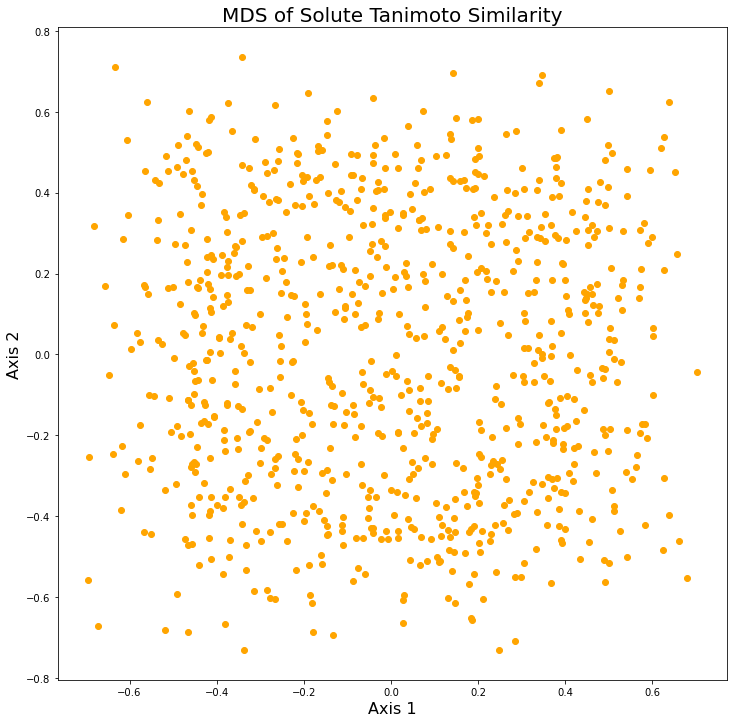

In [58]:
from sklearn.manifold import MDS

embedding_metric = MDS(metric = True, dissimilarity = 'precomputed', n_components = 2)
X_transformed_metric = embedding_metric.fit_transform(dissim_matrix)

embedding = MDS(metric = False, dissimilarity = 'precomputed', n_components = 2)
X_transformed = embedding.fit_transform(dissim_matrix)

fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('MDS of Solute Tanimoto Similarity', fontsize=20)
ax.set_xlabel('Axis 1', fontsize=16)
ax.set_ylabel('Axis 2', fontsize=16)
#ax = plt.scatter(X_transformed_metric[:,0], X_transformed_metric[:,1], color = 'blue')
ax = plt.scatter(X_transformed[:,0], X_transformed[:,1], color = 'orange')

Now, from scratch. First, initialize a random distribution of 873 points in R_2: ([-1, 1], [-1, 1]) 

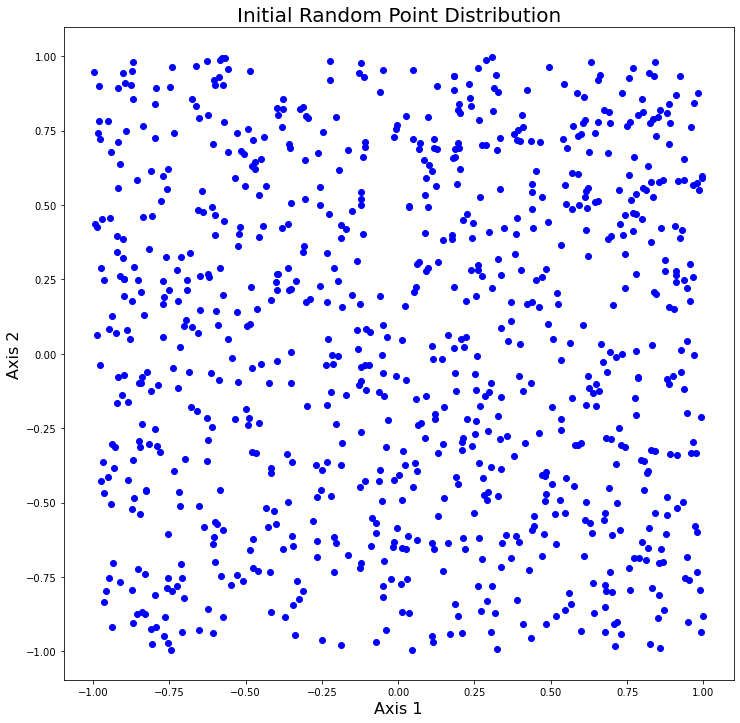

In [59]:
coords = np.random.uniform(-1.0, 1.0, size = (873, 2))
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('Initial Random Point Distribution', fontsize=20)
ax.set_xlabel('Axis 1', fontsize=16)
ax.set_ylabel('Axis 2', fontsize=16)
ax = plt.scatter(coords[:,0], coords[:,1], color = 'blue')

Let's try the linear algebra variation first:

[2.69762652e+01 1.19869361e+01 9.19699584e+00 8.49075347e+00
 7.14259432e+00 6.08277148e+00 5.95091568e+00 5.62460922e+00
 5.08294361e+00 5.02696887e+00 4.72871740e+00 4.29386466e+00
 4.09203013e+00 3.77070594e+00 3.68039235e+00 3.59857706e+00
 3.39692814e+00 3.24513101e+00 3.08787411e+00 2.96791870e+00
 2.84679309e+00 2.77733359e+00 2.67733519e+00 2.55496745e+00
 2.53955833e+00 2.43014655e+00 2.35491823e+00 2.22150549e+00
 2.19551978e+00 2.18090443e+00 2.09150332e+00 2.05234173e+00
 1.97030503e+00 1.88216860e+00 1.86870539e+00 1.79588795e+00
 1.78797287e+00 1.69909319e+00 1.64482155e+00 1.63589435e+00
 1.60916926e+00 1.52844747e+00 1.50731130e+00 1.45344351e+00
 1.41402936e+00 1.38681051e+00 1.34933247e+00 1.33606104e+00
 1.31836885e+00 1.30141392e+00 1.26097972e+00 1.24058589e+00
 1.22591883e+00 1.19386466e+00 1.18733962e+00 1.16735683e+00
 1.13387943e+00 1.10218905e+00 1.09519811e+00 1.07418877e+00
 1.05687457e+00 1.03302563e+00 1.03112791e+00 1.01253014e+00
 1.00241648e+00 9.885256

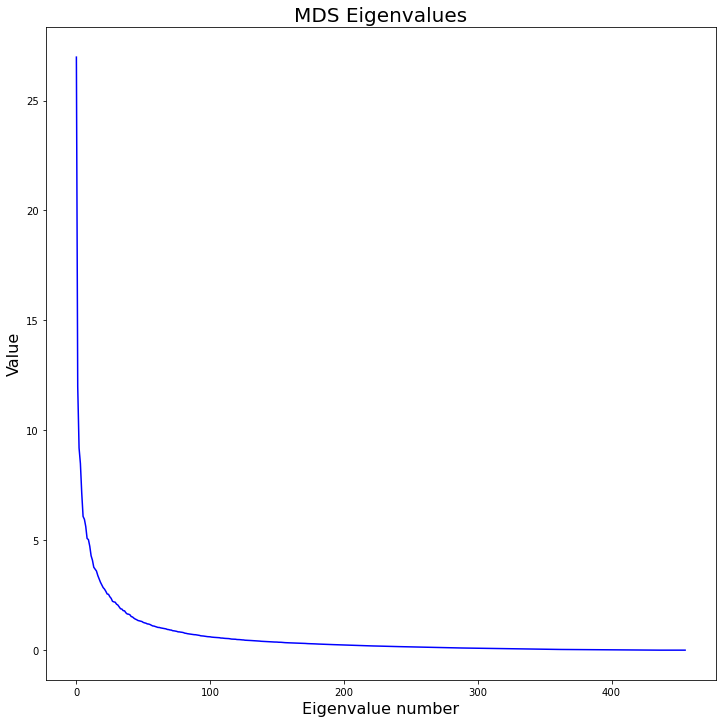

In [60]:
a = -0.5 * (1-tanimoto_matrix) ** 2
#doubly center data:
H = np.eye(a.shape[0])-(1/(a.shape[0]))*np.ones(a.shape)
B = H @ a @ H
eigval, eigvec = np.linalg.eig(B)
V_til = eigvec @ np.sqrt(np.diag(eigval))
#Now, find the number of positive eigenvalues, and just get the positive columns
d = np.real(sorted([i for i in eigval if i > 0], reverse = True))
print(d)
print(len(d))
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('MDS Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax = plt.plot(range(len(d)), d, color = 'blue')
plt.savefig('./SoluteMDSEigVal.png', bbox_inches='tight')
plt.savefig('./SoluteMDSEigVal.pdf', bbox_inches='tight')

In [61]:
tot_eig = d.sum()
tot_eig

287.91049124901895

In [62]:
running = 0
for ind_, val in enumerate(d):
    running += val
    if(running/tot_eig > 0.95):
        print(f'Number of dimensions needed to reduce strain to 5%: {ind_}')
        break

Number of dimensions needed to reduce strain to 5%: 224


### The solute molecules actually live in R224!

Now, let's label them based on polarity/functional group, and see if patterns emerge!

In [63]:
from rdkit.Chem import FunctionalGroups
fgs = FunctionalGroups.BuildFuncGroupHierarchy()


from collections import namedtuple
nt = namedtuple('pattern','smarts mol')
def flattenFgs(fgs,res):
    if not fgs:
        return
    for x in fgs:
        res[x.label]=nt(x.smarts,x.pattern)
        flattenFgs(x.children,res)
        
allFgDefs={}
flattenFgs(fgs,allFgDefs)
allFgNames=sorted(allFgDefs.keys())


In [64]:
solvent_desc_df_float_cent_smi['FuncGrp'] = np.nan
solvent_desc_df_float_cent_smi

,SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,FuncGrp
0,CCCCCCCC,-9.025790,-6.608088,-0.162242,-0.158553,-12.703433,-0.392159,-0.755194,-12.703433,-0.020546,...,-20.535647,-155.108815,-4.070970,-6.741451e+08,-22.413746,-66.392654,-82.793327,-3.462960,-1.919626,NaN
1,Cc1ccccc1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,...,-19.178552,-177.187065,-2.323496,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960,NaN
2,CCO,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,...,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626,NaN
3,C1COCCO1,-9.732897,-7.751226,-0.162242,-0.158553,-14.220974,-0.271544,-0.513965,-14.220974,0.123095,...,-21.781933,-181.197236,-2.171543,-6.741451e+08,-24.413746,-68.392654,-82.793327,-5.462960,-2.669626,NaN
4,CCC(C)=O,-10.928331,-8.446043,-0.162242,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,...,-25.469120,-197.192151,-2.918117,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,O=C(O)CCCc4cc2cccc1ccc3c(c12)c4ccc3,3.678271,1.248378,0.837758,-0.158553,7.037923,0.285937,0.600997,7.037923,0.119712,...,4.125765,18.865364,-0.879028,-6.741442e+08,11.586254,29.607346,41.206673,-1.074071,0.580374,NaN
12463,C1=C(SC(=C1)Br)C=O,-8.209293,-5.841773,-0.162242,-0.158553,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-79.340868,8.803434,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,NaN
12464,o1c(ccc1CN)C,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,NaN
12465,C(CCC(=O)O)CCN,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,...,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293,NaN


In [65]:
mols = [Chem.MolFromSmiles(smi) for smi in solvent_desc_df_float_cent_smi['SMILES']]

allFgs={}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    allFgs[fgn]=[m for m in mols if m.HasSubstructMatch(patt.mol)]

RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
[04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
[04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
[04:24:29] WARNING: not removing hydrogen atom without neighbors
[04:24:29] WARNING: not removing hydrogen atom without neighbors
[04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:29] WARNING: not removing hydrogen atom without neighbors
[04:24:29] WARNING: not removing hy

In [66]:
solvent_desc_df_float_cent_smi

,SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,FuncGrp
0,CCCCCCCC,-9.025790,-6.608088,-0.162242,-0.158553,-12.703433,-0.392159,-0.755194,-12.703433,-0.020546,...,-20.535647,-155.108815,-4.070970,-6.741451e+08,-22.413746,-66.392654,-82.793327,-3.462960,-1.919626,NaN
1,Cc1ccccc1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,...,-19.178552,-177.187065,-2.323496,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960,NaN
2,CCO,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,...,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626,NaN
3,C1COCCO1,-9.732897,-7.751226,-0.162242,-0.158553,-14.220974,-0.271544,-0.513965,-14.220974,0.123095,...,-21.781933,-181.197236,-2.171543,-6.741451e+08,-24.413746,-68.392654,-82.793327,-5.462960,-2.669626,NaN
4,CCC(C)=O,-10.928331,-8.446043,-0.162242,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,...,-25.469120,-197.192151,-2.918117,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,O=C(O)CCCc4cc2cccc1ccc3c(c12)c4ccc3,3.678271,1.248378,0.837758,-0.158553,7.037923,0.285937,0.600997,7.037923,0.119712,...,4.125765,18.865364,-0.879028,-6.741442e+08,11.586254,29.607346,41.206673,-1.074071,0.580374,NaN
12463,C1=C(SC(=C1)Br)C=O,-8.209293,-5.841773,-0.162242,-0.158553,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-79.340868,8.803434,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,NaN
12464,o1c(ccc1CN)C,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,NaN
12465,C(CCC(=O)O)CCN,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,...,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293,NaN


### Truth label data with functional groups
First, bin the solute molecules

In [67]:
fg_binned = {}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    fg_binned[fgn]=[ind for ind, m in enumerate(mols) if m.HasSubstructMatch(patt.mol)]
    print('%s: Found %d '%(fgn,len(fg_binned[fgn])))   

AcidChloride: Found 0 
AcidChloride.Aliphatic: Found 0 
AcidChloride.Aromatic: Found 0 
Alcohol: Found 171 
Alcohol.Aliphatic: Found 118 
Alcohol.Aromatic: Found 66 
Aldehyde: Found 27 
Aldehyde.Aliphatic: Found 8 
Aldehyde.Aromatic: Found 19 
Amine: Found 197 
Amine.Aliphatic: Found 123 
Amine.Aromatic: Found 88 
Amine.Cyclic: Found 38 
Amine.Primary: Found 120 
Amine.Primary.Aliphatic: Found 62 
Amine.Primary.Aromatic: Found 60 
Amine.Secondary: Found 44 
Amine.Secondary.Aliphatic: Found 34 
Amine.Secondary.Aromatic: Found 10 
Amine.Tertiary: Found 46 
Amine.Tertiary.Aliphatic: Found 31 
Amine.Tertiary.Aromatic: Found 2 
Azide: Found 0 
Azide.Aliphatic: Found 0 
Azide.Aromatic: Found 0 
BoronicAcid: Found 0 
BoronicAcid.Aliphatic: Found 0 
BoronicAcid.Aromatic: Found 0 
CarboxylicAcid: Found 164 
CarboxylicAcid.Aliphatic: Found 109 
CarboxylicAcid.AlphaAmino: Found 1 
CarboxylicAcid.Aromatic: Found 55 
Halogen: Found 158 
Halogen.Aliphatic: Found 45 
Halogen.Aromatic: Found 113 
Halo

In [68]:
fg_binned['Aldehyde.Aliphatic']

[98, 146, 183, 184, 226, 690, 700, 854]

In [69]:
# Coarse grain bin the solute db.
for smi in solvent_desc_df_float_cent_smi['SMILES']:
    mol_ = Chem.MolFromSmiles(smi)
    for fgn in allFgNames:
        patt = allFgDefs[fgn]
        batch = fgn.split('.')[0]
        if mol_.HasSubstructMatch(patt.mol):
            solvent_desc_df_float_cent_smi.loc[solvent_desc_df_float_cent_smi['SMILES'] == smi, 'FuncGrp'] = batch

RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:30] WARNING: not removing hydrogen atom without neighbors
[04:24:30] WARNING: not removing hydrogen atom wit

In [70]:
solvent_desc_df_float_cent_smi

,SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,FuncGrp
0,CCCCCCCC,-9.025790,-6.608088,-0.162242,-0.158553,-12.703433,-0.392159,-0.755194,-12.703433,-0.020546,...,-20.535647,-155.108815,-4.070970,-6.741451e+08,-22.413746,-66.392654,-82.793327,-3.462960,-1.919626,NaN
1,Cc1ccccc1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,...,-19.178552,-177.187065,-2.323496,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960,NaN
2,CCO,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,...,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626,Alcohol
3,C1COCCO1,-9.732897,-7.751226,-0.162242,-0.158553,-14.220974,-0.271544,-0.513965,-14.220974,0.123095,...,-21.781933,-181.197236,-2.171543,-6.741451e+08,-24.413746,-68.392654,-82.793327,-5.462960,-2.669626,NaN
4,CCC(C)=O,-10.928331,-8.446043,-0.162242,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,...,-25.469120,-197.192151,-2.918117,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,O=C(O)CCCc4cc2cccc1ccc3c(c12)c4ccc3,3.678271,1.248378,0.837758,-0.158553,7.037923,0.285937,0.600997,7.037923,0.119712,...,4.125765,18.865364,-0.879028,-6.741442e+08,11.586254,29.607346,41.206673,-1.074071,0.580374,CarboxylicAcid
12463,C1=C(SC(=C1)Br)C=O,-8.209293,-5.841773,-0.162242,-0.158553,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-79.340868,8.803434,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,Halogen
12464,o1c(ccc1CN)C,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,Amine
12465,C(CCC(=O)O)CCN,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,...,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293,CarboxylicAcid


In [71]:
fg_hist = {}
for key in fg_binned.keys():
    fg_hist[key] = len(fg_binned[key])
fg_hist

{'AcidChloride': 0,
 'AcidChloride.Aliphatic': 0,
 'AcidChloride.Aromatic': 0,
 'Alcohol': 171,
 'Alcohol.Aliphatic': 118,
 'Alcohol.Aromatic': 66,
 'Aldehyde': 27,
 'Aldehyde.Aliphatic': 8,
 'Aldehyde.Aromatic': 19,
 'Amine': 197,
 'Amine.Aliphatic': 123,
 'Amine.Aromatic': 88,
 'Amine.Cyclic': 38,
 'Amine.Primary': 120,
 'Amine.Primary.Aliphatic': 62,
 'Amine.Primary.Aromatic': 60,
 'Amine.Secondary': 44,
 'Amine.Secondary.Aliphatic': 34,
 'Amine.Secondary.Aromatic': 10,
 'Amine.Tertiary': 46,
 'Amine.Tertiary.Aliphatic': 31,
 'Amine.Tertiary.Aromatic': 2,
 'Azide': 0,
 'Azide.Aliphatic': 0,
 'Azide.Aromatic': 0,
 'BoronicAcid': 0,
 'BoronicAcid.Aliphatic': 0,
 'BoronicAcid.Aromatic': 0,
 'CarboxylicAcid': 164,
 'CarboxylicAcid.Aliphatic': 109,
 'CarboxylicAcid.AlphaAmino': 1,
 'CarboxylicAcid.Aromatic': 55,
 'Halogen': 158,
 'Halogen.Aliphatic': 45,
 'Halogen.Aromatic': 113,
 'Halogen.Bromine': 32,
 'Halogen.Bromine.Aliphatic': 12,
 'Halogen.Bromine.Aromatic': 20,
 'Halogen.Bromine.

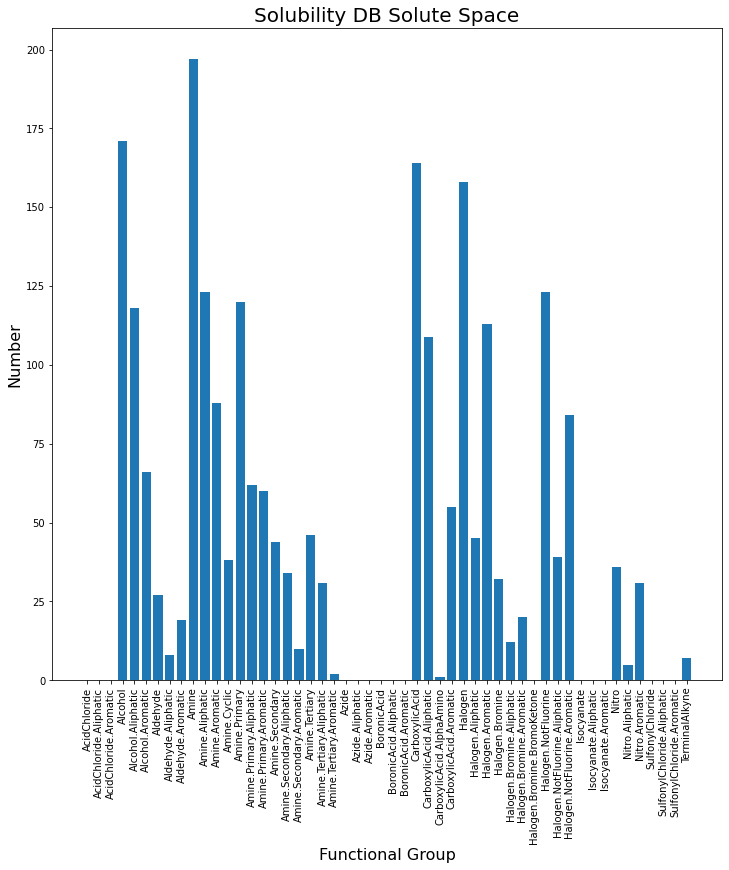

In [72]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('Solubility DB Solute Space', fontsize=20)
ax.set_xlabel('Functional Group', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax = plt.bar(fg_hist.keys(), fg_hist.values())
plt.xticks(rotation=90)
plt.savefig('./SoluteFuncGrps.png', bbox_inches='tight')
plt.savefig('./SoluteFuncGrps.pdf', bbox_inches='tight')

## Neural Network Predictor <a name="Predictor"></a>

In [73]:
# Load in the solubility df. This is the data we really want to work with!
solubility_df = pd.read_csv('TemporaryMergedExperimentalDatabase.csv')

In [74]:
solubility_df

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2,Mole Fraction Solvent 1,Mole Fraction Solvent 2,Density (g/mL),T (K),log(S),log(Xs),Reference (DOI),Comments,MW,pph(g/100g),DeltaGsolv
0,O.O.Oc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(O)c3)O,CC(O)=O,NaN,1.0,0.0,NaN,NaN,1.083911,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,338.270,NaN,NaN
1,CCC(C)C1NC2C=Cc3c(cc(nc3C2O)C(=O)OC(C)C4NC(=O)...,CC(O)=O,NaN,1.0,0.0,NaN,NaN,2.709111,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,1664.900,NaN,NaN
2,CC(\CO)=C/CNc1ncnc2n(cnc12)[C@@H]3O[C@H](CO)[C...,CC(O)=O,NaN,1.0,0.0,NaN,NaN,4.957967,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,351.360,NaN,NaN
3,CC(\CO)=C/CNc1ncnc2nc[nH]c12,CC(O)=O,NaN,1.0,0.0,NaN,NaN,5.429611,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,219.240,NaN,NaN
4,Nc1ccc(cc1)[S](=O)(=O)Nc2ccccn2,CC(C)=O,NaN,1.0,0.0,NaN,NaN,-1.054946,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,249.290,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20014,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,O,NaN,1.0,0.0,0.997,298.15,-3.010000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",264.369,NaN,NaN
20015,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,O,NaN,1.0,0.0,0.997,298.15,-2.930000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",444.440,NaN,NaN
20016,c1(cc(ccc1C(C)C)C)O,O,NaN,1.0,0.0,0.997,298.15,-2.190000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",150.221,NaN,NaN
20017,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,O,NaN,1.0,0.0,0.997,298.15,-3.980000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",454.611,NaN,NaN


In [75]:
#The initial db contains some solvent blends - discard these
solubility_df = solubility_df.loc[(solubility_df['SMILES Solvent 2'].isnull())]
solubility_df

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2,Mole Fraction Solvent 1,Mole Fraction Solvent 2,Density (g/mL),T (K),log(S),log(Xs),Reference (DOI),Comments,MW,pph(g/100g),DeltaGsolv
0,O.O.Oc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(O)c3)O,CC(O)=O,NaN,1.0,0.0,NaN,NaN,1.083911,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,338.270,NaN,NaN
1,CCC(C)C1NC2C=Cc3c(cc(nc3C2O)C(=O)OC(C)C4NC(=O)...,CC(O)=O,NaN,1.0,0.0,NaN,NaN,2.709111,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,1664.900,NaN,NaN
2,CC(\CO)=C/CNc1ncnc2n(cnc12)[C@@H]3O[C@H](CO)[C...,CC(O)=O,NaN,1.0,0.0,NaN,NaN,4.957967,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,351.360,NaN,NaN
3,CC(\CO)=C/CNc1ncnc2nc[nH]c12,CC(O)=O,NaN,1.0,0.0,NaN,NaN,5.429611,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,219.240,NaN,NaN
4,Nc1ccc(cc1)[S](=O)(=O)Nc2ccccn2,CC(C)=O,NaN,1.0,0.0,NaN,NaN,-1.054946,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,249.290,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20014,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,O,NaN,1.0,0.0,0.997,298.15,-3.010000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",264.369,NaN,NaN
20015,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,O,NaN,1.0,0.0,0.997,298.15,-2.930000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",444.440,NaN,NaN
20016,c1(cc(ccc1C(C)C)C)O,O,NaN,1.0,0.0,0.997,298.15,-2.190000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",150.221,NaN,NaN
20017,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,O,NaN,1.0,0.0,0.997,298.15,-3.980000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",454.611,NaN,NaN


In [76]:
solubility_df.count()

SMILES SOLUTE               10996
SMILES Solvent 1            10996
SMILES Solvent 2                0
Mole Fraction Solvent 1     10996
Mole Fraction  Solvent 2    10996
Density (g/mL)              10657
T (K)                        9982
log(S)                      10996
log(Xs)                       675
Reference (DOI)             10996
Comments                    10996
MW                          10996
pph(g/100g)                   675
DeltaGsolv                      0
dtype: int64

In [77]:
solubility_df_cp = solubility_df.copy()
print(len(list(set(solubility_df['SMILES SOLUTE']))))

10265


In [78]:
solutes = []
errors = []
for ind, x in enumerate(tqdm(solubility_df['SMILES SOLUTE'])):
    try:
        solutes.append(Chem.MolToSmiles(Chem.MolFromSmiles(x)))
        solubility_df_cp['SMILES SOLUTE'][x] = Chem.MolToSmiles(Chem.MolFromSmiles(x))
    except:
        errors.append(ind)

  0%|                                                                                                | 0/10996 [00:00<?, ?it/s]/tmp/ipykernel_635818/1578456397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solubility_df_cp['SMILES SOLUTE'][x] = Chem.MolToSmiles(Chem.MolFromSmiles(x))
  0%|▏                                                                                     | 22/10996 [00:00<00:51, 213.05it/s]RDKit WARNING: [04:24:33] WARNING: not removing hydrogen atom without neighbors
[04:24:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:33] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:24:33] WARNING: not removing hydrogen atom without neighbors
[04:24:33]

In [84]:
print(errors)

[713, 714, 715]


In [85]:
print(len(solutes))

10993


In [86]:
print(len(list(set(solutes))))

10185


In [87]:
print(len(smi_list))

12469


In [88]:
solubility_df_cp.set_index('SMILES SOLUTE')
solubility_df_cp

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2,Mole Fraction Solvent 1,Mole Fraction Solvent 2,Density (g/mL),T (K),log(S),log(Xs),Reference (DOI),Comments,MW,pph(g/100g),DeltaGsolv
0,O.O.Oc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(O)c3)O,CC(O)=O,NaN,1.0,0.0,NaN,NaN,1.083911,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,338.270,NaN,NaN
1,CCC(C)C1NC2C=Cc3c(cc(nc3C2O)C(=O)OC(C)C4NC(=O)...,CC(O)=O,NaN,1.0,0.0,NaN,NaN,2.709111,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,1664.900,NaN,NaN
2,CC(\CO)=C/CNc1ncnc2n(cnc12)[C@@H]3O[C@H](CO)[C...,CC(O)=O,NaN,1.0,0.0,NaN,NaN,4.957967,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,351.360,NaN,NaN
3,CC(\CO)=C/CNc1ncnc2nc[nH]c12,CC(O)=O,NaN,1.0,0.0,NaN,NaN,5.429611,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,219.240,NaN,NaN
4,Nc1ccc(cc1)[S](=O)(=O)Nc2ccccn2,CC(C)=O,NaN,1.0,0.0,NaN,NaN,-1.054946,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,249.290,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20014,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,O,NaN,1.0,0.0,0.997,298.15,-3.010000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",264.369,NaN,NaN
20015,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,O,NaN,1.0,0.0,0.997,298.15,-2.930000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",444.440,NaN,NaN
20016,c1(cc(ccc1C(C)C)C)O,O,NaN,1.0,0.0,0.997,298.15,-2.190000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",150.221,NaN,NaN
20017,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,O,NaN,1.0,0.0,0.997,298.15,-3.980000,NaN,10.1038/s41597-019-0151-1,"From AqSolDB, Density and temp are aproximated...",454.611,NaN,NaN


In [89]:
# Need to write a function that takes a smiles, loops through the solubility df and checks if each solvent SMILES matches. If it does,
# right join the corresponding row from the Mordred df. Otherwise, drop the row.
desc_smiles = []

for smi in solvent_desc_df_float_cent_smi['SMILES']:
    try:
        desc_smiles.append(Chem.MolToSmiles(Chem.MolFromSmiles(smi)))
    except:
        print(f'Excpetion, {smi}')
    
for smi in solvent_desc_df_float_cent_smi['SMILES']:
    try:
        print(solubility_df.loc[smi])
    except:
        print(f'{smi} not found')

CCCCCCCC not found
 Cc1ccccc1 not found
 CCO not found
 C1COCCO1 not found
 CCC(C)=O not found
 Cc1ccccn1 not found
 c1ccc2ccccc2c1 not found
 Oc1ccccc1 not found
 Cc1cccc(O)c1 not found
 CC(O)=O not found
 CCC(O)=O not found
 CCCC(O)=O not found
 CN(C)C not found
 CCNCC not found
 c1ccncc1 not found
 Nc1ccccc1 not found
 N not found
 CN not found
 CC(C)CC(C)=O not found
 CCCCCCCC not found
 C[N+]([O-])=O not found
 CC#N not found
 CC(=O)c1ccccc1 not found
 OO not found
 COc1ccccc1 not found
 CCCCN not found
 CCCCC not found
 CCCCCC not found
 C1CCCCC1 not found
 c1ccccc1 not found
 CO not found
 CCCO not found
 CC(C)O not found
 CCCCO not found
 CC(C)(C)O not found
 CCCCCO not found
 CCCCCCO not found
 Cc1ccccc1O not found
 Cc1ccc(O)cc1 not found
 CCCCCCCO not found
 CC(C)=O not found
 CCCC(C)=O not found
 CCCCC(C)=O not found
 CCCCCC(C)=O not found
 CCCCC(O)=O not found
 CCCCCC(O)=O not found
 COC(C)=O not found
 CCC(=O)OC not found
 CCOC(C)=O not found
 CCCOC(C)=O not found
 CCCCC(=

RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom without neighbors
[04:29:01] WARNING: not removing hydrogen atom wit

In [90]:
# Lets try predicting the solute type from the descriptors! We'll use the solvent_desc_df_float_cent_smi df as our data table, with 
# the coarse-grained functional groups as truth labels.

In [91]:
solvent_desc_df_float_cent_smi = solvent_desc_df_float_cent_smi.dropna(subset=['FuncGrp'])

In [92]:
solvent_desc_df_float_cent_smi

,SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,FuncGrp
2,CCO,-12.561324,-10.337012,-0.162242,-0.158553,-19.392547,-0.857331,-1.685538,-19.392547,-0.267429,...,-35.412479,-223.207801,-3.345240,-6.741452e+08,-27.413746,-86.392654,-102.793327,-4.712960,-3.169626,Alcohol
7,Oc1ccccc1,-8.916400,-6.965371,-0.162242,-0.158553,-13.500408,-0.170541,-0.311959,-13.500408,0.035557,...,-19.178552,-175.207801,-1.227013,-6.741451e+08,-22.413746,-62.392654,-75.793327,-4.601849,-2.502960,Alcohol
8,Cc1cccc(O)c1,-8.099904,-6.185185,-0.162242,-0.158553,-12.789827,-0.096216,-0.163309,-12.789827,-0.031345,...,-16.968103,-161.192151,-1.707408,-6.741451e+08,-20.413746,-56.392654,-68.793327,-3.740738,-2.336293,Alcohol
9,CC(O)=O,-11.526048,-9.301736,0.837758,-0.158553,-18.756873,-0.539493,-1.049863,-18.756873,-0.344213,...,-28.543553,-209.228536,-0.958361,-6.741452e+08,-27.413746,-80.392654,-97.793327,-3.851849,-3.169626,CarboxylicAcid
10,CCC(O)=O,-10.928331,-8.446043,0.837758,-0.158553,-16.994722,-0.423785,-0.818447,-16.994722,-0.164988,...,-25.469120,-195.212886,-1.730386,-6.741452e+08,-25.413746,-76.392654,-92.793327,-3.601849,-2.836293,CarboxylicAcid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,O=C(O)CCCc4cc2cccc1ccc3c(c12)c4ccc3,3.678271,1.248378,0.837758,-0.158553,7.037923,0.285937,0.600997,7.037923,0.119712,...,4.125765,18.865364,-0.879028,-6.741442e+08,11.586254,29.607346,41.206673,-1.074071,0.580374,CarboxylicAcid
12463,C1=C(SC(=C1)Br)C=O,-8.209293,-5.841773,-0.162242,-0.158553,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-79.340868,8.803434,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,Halogen
12464,o1c(ccc1CN)C,-8.209293,-5.841773,-0.162242,0.841447,-12.310879,-0.047042,-0.319354,-12.310879,0.028524,...,-3.657664,-158.181252,-1.927566,-6.741451e+08,-21.413746,-56.392654,-67.793327,-3.740738,-2.252960,Amine
12465,C(CCC(=O)O)CCN,-8.099904,-5.807441,0.837758,0.841447,-11.969312,-0.309974,-0.590824,-11.969312,-0.071165,...,-17.977724,-138.155037,-2.502156,-6.741451e+08,-21.413746,-60.392654,-76.793327,-2.601849,-1.836293,CarboxylicAcid


In [93]:
# Let's build a neural net in Keras/TF:
import tensorflow as tf
from sklearn import preprocessing
from sklearn import model_selection

2022-05-13 04:29:06.593320: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [94]:
x = solvent_desc_df_float_cent_smi.iloc[:, :-1]
x = x.drop(columns = ['SMILES'])
y = solvent_desc_df_float_cent_smi.iloc[:, -1]

In [95]:
x_val = x.values
x_val

array([[ -12.56132385,  -10.3370121 ,   -0.16224236, ..., -102.79332745,
          -4.7129601 ,   -3.16962623],
       [  -8.91640014,   -6.96537139,   -0.16224236, ...,  -75.79332745,
          -4.60184899,   -2.50295956],
       [  -8.09990356,   -6.18518466,   -0.16224236, ...,  -68.79332745,
          -3.74073788,   -2.3362929 ],
       ...,
       [  -8.20929336,   -5.84177345,   -0.16224236, ...,  -67.79332745,
          -3.74073788,   -2.25295956],
       [  -8.09990356,   -5.80744076,    0.83775764, ...,  -76.79332745,
          -2.60184899,   -1.8362929 ],
       [  -6.68569   ,   -4.74398558,    0.83775764, ...,  -68.79332745,
          -2.10184899,   -1.3362929 ]])

In [96]:
y = y.values
y

array(['Alcohol', 'Alcohol', 'Alcohol', 'CarboxylicAcid',
       'CarboxylicAcid', 'CarboxylicAcid', 'Amine', 'Amine', 'Amine',
       'Amine', 'Nitro', 'Amine', 'Alcohol', 'Alcohol', 'Alcohol',
       'Alcohol', 'Alcohol', 'Alcohol', 'Alcohol', 'Alcohol', 'Alcohol',
       'Alcohol', 'CarboxylicAcid', 'CarboxylicAcid', 'Amine', 'Amine',
       'Amine', 'Amine', 'Amine', 'Nitro', 'Aldehyde', 'Aldehyde',
       'Halogen', 'Amine', 'Alcohol', 'Nitro', 'Nitro', 'Amine', 'Amine',
       'Amine', 'Alcohol', 'Halogen', 'Halogen', 'Alcohol', 'Nitro',
       'Halogen', 'Aldehyde', 'Aldehyde', 'Nitro', 'Alcohol', 'Amine',
       'Halogen', 'Halogen', 'Alcohol', 'Amine', 'Halogen', 'Halogen',
       'Halogen', 'Halogen', 'Halogen', 'Alcohol', 'Alcohol', 'Alcohol',
       'Aldehyde', 'Halogen', 'Halogen', 'Halogen', 'Halogen',
       'TerminalAlkyne', 'TerminalAlkyne', 'TerminalAlkyne',
       'TerminalAlkyne', 'TerminalAlkyne', 'Aldehyde', 'Aldehyde',
       'Amine', 'Nitro', 'Nitro', 'Nitro', '

In [97]:
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [98]:
le.classes_

array(['Alcohol', 'Aldehyde', 'Amine', 'CarboxylicAcid', 'Halogen',
       'Nitro', 'TerminalAlkyne'], dtype=object)

In [99]:
y_val = le.transform(y)
y_val

array([0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 2, 2, 2, 2, 2, 5, 1, 1, 4, 2, 0, 5, 5, 2, 2, 2, 0, 4, 4, 0,
       5, 4, 1, 1, 5, 0, 2, 4, 4, 0, 2, 4, 4, 4, 4, 4, 0, 0, 0, 1, 4, 4,
       4, 4, 6, 6, 6, 6, 6, 1, 1, 2, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 4, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 0, 4, 0, 4, 4, 0, 3, 5, 5, 0, 0, 0, 3, 0,
       3, 3, 3, 4, 4, 0, 2, 2, 2, 2, 2, 2, 6, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 3, 3, 5, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 5, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 5, 5, 4, 3, 3, 5, 4, 3, 5, 4, 3, 4, 5, 0, 0, 3, 5, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 3, 3, 4, 2, 6, 3, 0, 4,
       4, 4, 0, 4, 3, 3, 3, 4, 3, 0, 4, 3, 3, 4, 3, 2, 2, 4, 4, 2, 4, 2,
       3, 3, 0, 0, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3,
       0, 3, 2, 2, 3, 2, 2, 3, 4, 0, 2, 3, 2, 4, 4,

In [100]:
sc = preprocessing.StandardScaler()
x_val_sc = sc.fit_transform(x_val)

/home/sabari/anaconda3/envs/yuma/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/sabari/anaconda3/envs/yuma/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/home/sabari/anaconda3/envs/yuma/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [101]:
print(x_val_sc.shape)
x_val_sc

(550, 1613)


array([[-0.81671157, -0.90768812, -0.56494698, ..., -0.81822361,
        -0.60116204, -0.74024558],
       [-0.57073001, -0.60588503, -0.56494698, ..., -0.59405896,
        -0.58741395, -0.58064475],
       [-0.51562786, -0.53604878, -0.56494698, ..., -0.5359422 ,
        -0.48086628, -0.54074454],
       ...,
       [-0.52301015, -0.50530928, -0.56494698, ..., -0.5276398 ,
        -0.48086628, -0.52079444],
       [-0.51562786, -0.50223608,  0.50650419, ..., -0.60236135,
        -0.33994839, -0.42104392],
       [-0.42018815, -0.40704383,  0.50650419, ..., -0.5359422 ,
        -0.278082  , -0.30134329]])

In [102]:
# Before one hot encoding our y values, let's split the dataset into traiing and test sets.

In [103]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_val_sc, y_val, test_size = 0.3, random_state = 1)

In [104]:
ohe = preprocessing.OneHotEncoder()
y_train_sc = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()

In [105]:
y_train_sc.shape

(440, 7)

In [106]:
y_test_sc = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

In [107]:
print(len(y_train_sc))
print(len(y_train_sc[0]))

440
7


In [108]:
# Now that we have a one-hot encoded y vector and the initial x vectors, we can train our NN. We'll start with all of our features:
# we have dimensions of 1613 and 7 for the input and output layers respectively. We'll use two hidden layers of size 512 and 128 to
# start.

In [63]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, input_dim = 1613, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(7, activation = 'softmax'))

2022-05-09 08:21:39.364711: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-09 08:21:39.365518: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-09 08:21:39.388400: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-05-09 08:21:39.388479: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: sabari-ThinkPad-X1-Extreme-Gen-3
2022-05-09 08:21:39.388486: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: sabari-ThinkPad-X1-Extreme-Gen-3
2022-05-09 08:21:39.388568: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.60.2
2022-05-09 08:21:39.388587: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.60.2
2022-05-09 08:21:39.388591: I tensor

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history = model.fit(x_train, y_train_sc, epochs=1000, batch_size=512)

Epoch 1/1000
1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.1273
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1273
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1273
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1273
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1273
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1273
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1273
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1273
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1273
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1273
Epoch 11/1000
1/1 [=======================

In [67]:
y_pred = model.predict(x_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [68]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [69]:
history = model.fit(x_train, y_train_sc, validation_data = (x_test,y_test_sc), epochs=1000, batch_size=512)

Epoch 1/1000
1/1 [==============================] - 0s 154ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 2/1000
1/1 [==============================] - 0s 31ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 3/1000
1/1 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 4/1000
1/1 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 5/1000
1/1 [==============================] - 0s 37ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 6/1000
1/1 [==============================] - 0s 35ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 7/1000
1/1 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.1273 - val_loss: nan - val_accuracy: 0.1364
Epoch 8/1000
1/1 [==============================] - 0s

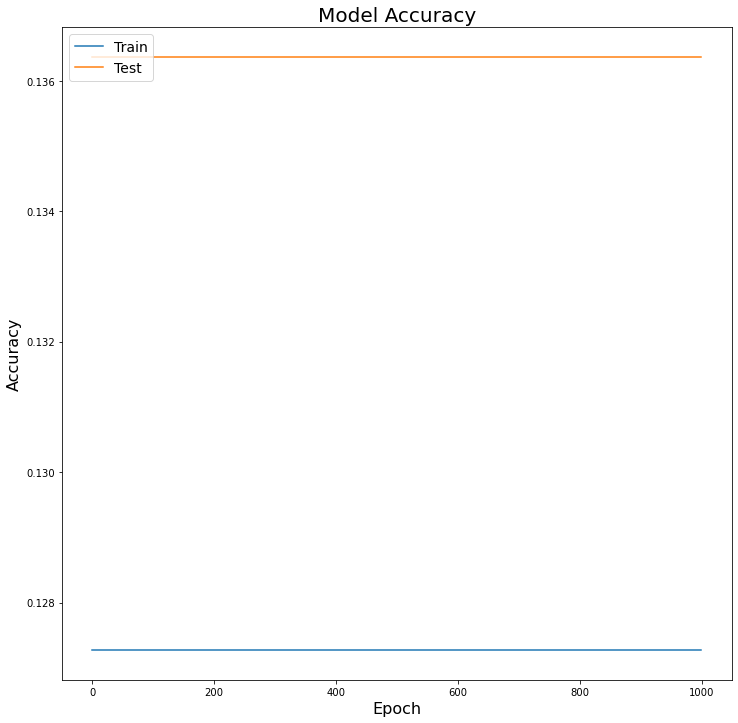

In [70]:
fig=plt.figure(figsize = (12, 12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 16)
plt.xlabel('Epoch', fontsize = 16)
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 14)
plt.show()

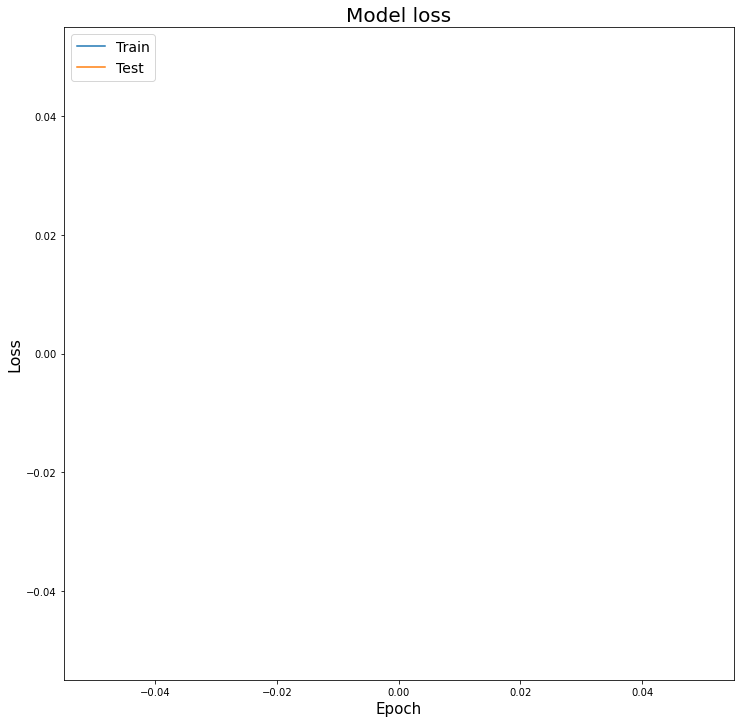

In [71]:
fig=plt.figure(figsize = (12, 12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss', fontsize = 20) 
plt.ylabel('Loss', fontsize = 16) 
plt.xlabel('Epoch', fontsize = 15) 
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 14) 
plt.show()

In [145]:
# Now, lets retry with selected descriptors. H bond donor/acceptor, topological polarized surface area.

x_1 = solvent_desc_df_float_cent_smi[['nHetero','nHBAcc', 'nHBDon', 'TopoPSA', 'BalabanJ', 'SLogP']]
x_1_val = x_1.values
x_1_val.shape


(550, 6)

In [146]:
x_1_val_sc = sc.fit_transform(x_1_val)

In [147]:
x_1_train, x_1_test, y_1_train, y_1_test = model_selection.train_test_split(x_1_val_sc, y_val, test_size = 0.2, random_state = 1)

In [148]:
ohe = preprocessing.OneHotEncoder()
y_1_train_sc = ohe.fit_transform(y_1_train.reshape(-1, 1)).toarray()
y_1_test_sc = ohe.fit_transform(y_1_test.reshape(-1, 1)).toarray()

In [149]:
print(len(y_train_sc))
print(len(y_train_sc[0]))

440
7


In [208]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(128, input_dim = x_1_train.shape[1], activation = 'relu'))
model1.add(tf.keras.layers.Dense(64, activation = 'relu'))
model1.add(tf.keras.layers.Dense(7, activation = 'softmax'))

In [209]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0005)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [210]:
history1 = model1.fit(x_1_train, y_1_train_sc, epochs=250, batch_size=8)

Epoch 1/250
55/55 [==============================] - 0s 1ms/step - loss: 1.8757 - accuracy: 0.2360
Epoch 2/250
55/55 [==============================] - 0s 877us/step - loss: 1.6452 - accuracy: 0.3527
Epoch 3/250
55/55 [==============================] - 0s 818us/step - loss: 1.5094 - accuracy: 0.4108
Epoch 4/250
55/55 [==============================] - 0s 881us/step - loss: 1.4732 - accuracy: 0.4378
Epoch 5/250
55/55 [==============================] - 0s 881us/step - loss: 1.3708 - accuracy: 0.4789
Epoch 6/250
55/55 [==============================] - 0s 869us/step - loss: 1.3595 - accuracy: 0.4833
Epoch 7/250
55/55 [==============================] - 0s 894us/step - loss: 1.3438 - accuracy: 0.5091
Epoch 8/250
55/55 [==============================] - 0s 899us/step - loss: 1.2756 - accuracy: 0.5088
Epoch 9/250
55/55 [==============================] - 0s 872us/step - loss: 1.2882 - accuracy: 0.5360
Epoch 10/250
55/55 [==============================] - 0s 901us/step - loss: 1.2552 - accuracy

In [211]:
y_1_pred = model1.predict(x_1_test)
#Converting predictions to label
pred_1 = list()
for i in range(len(y_1_pred)):
    pred_1.append(np.argmax(y_1_pred[i]))
#Converting one hot encoded test label to label
test_1 = list()
for i in range(len(y_1_test)):
    test_1.append(np.argmax(y_1_test[i]))

In [212]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred_1,test_1)
print('Accuracy is:', a*100)

Accuracy is: 14.545454545454545


In [213]:
history1 = model1.fit(x_1_train, y_1_train_sc, validation_data = (x_1_test,y_1_test_sc), epochs=250, batch_size=8)

Epoch 1/250
55/55 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9318 - val_loss: 0.9762 - val_accuracy: 0.7455
Epoch 2/250
55/55 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9386 - val_loss: 0.9950 - val_accuracy: 0.7636
Epoch 3/250
55/55 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9227 - val_loss: 0.9891 - val_accuracy: 0.7273
Epoch 4/250
55/55 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9341 - val_loss: 0.9878 - val_accuracy: 0.7364
Epoch 5/250
55/55 [==============================] - 0s 1ms/step - loss: 0.1996 - accuracy: 0.9295 - val_loss: 0.9819 - val_accuracy: 0.7455
Epoch 6/250
55/55 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9364 - val_loss: 1.0076 - val_accuracy: 0.7364
Epoch 7/250
55/55 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9364 - val_loss: 1.0027 - val_accuracy: 0.7364
Epoch 8/250
5

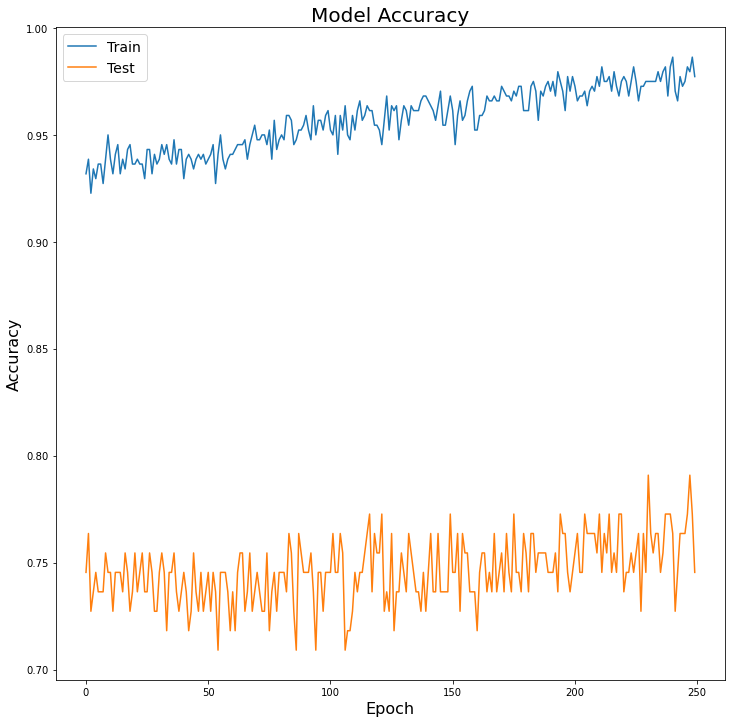

In [214]:
fig=plt.figure(figsize = (12, 12))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 16)
plt.xlabel('Epoch', fontsize = 16)
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 14)
plt.show()

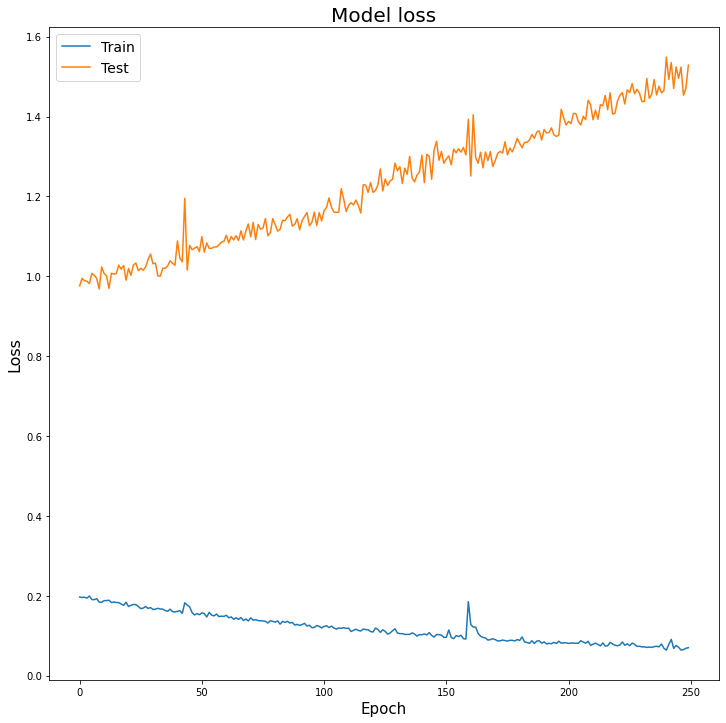

In [215]:
fig=plt.figure(figsize = (12, 12))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss']) 
plt.title('Model loss', fontsize = 20) 
plt.ylabel('Loss', fontsize = 16) 
plt.xlabel('Epoch', fontsize = 15) 
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 14) 
plt.show()